# Word2Vec Embeddings in NLP

## 📖 What is Word2Vec?

**Word2Vec** is a neural embedding technique that learns **dense vector representations** of words based on their **context** in a corpus.

Unlike one-hot or TF-IDF representations, Word2Vec captures **semantic meaning** and **syntactic relationships** between words.

---

## 🔧 How It Works

Word2Vec uses a shallow neural network to predict:

- **Skip-Gram Model**: Given a word $w_t$, predict its surrounding context words $w_{t - c}, ..., w_{t + c}$
- **CBOW Model**: Given context words, predict the target word $w_t$

### Objective (Skip-Gram):

Maximize the average log probability:

$$
\frac{1}{T} \sum_{t=1}^{T} \sum_{-c \leq j \leq c, j \neq 0} \log P(w_{t+j} \mid w_t)
$$

Where:
- $c$ is the context window size
- $T$ is the total number of words in the corpus

The result is a **dense vector space** where **similar words have similar vectors**.

---

## Vector Properties

- Each word is mapped to a fixed-size vector (e.g., 100 or 300 dimensions)
- Vectors encode **semantic relationships**, such as:

$$
\text{vec("king")} - \text{vec("man")} + \text{vec("woman")} \approx \text{vec("queen")}
$$

---

## Advantages of Word2Vec

| Advantage                      | Description |
|-------------------------------|-------------|
| **Context-aware**             | Captures local context using sliding windows |
| **Dense, low-dimensional**    | Compared to sparse BoW or TF-IDF vectors |
| **Semantic meaning**          | Similar words have similar embeddings |
| **Analogy reasoning**         | Supports vector arithmetic like "king - man + woman = queen" |
| **Efficient**                 | Trained quickly with negative sampling or hierarchical softmax |

---

## ❌ Disadvantages of Word2Vec

| Disadvantage                  | Description |
|------------------------------|-------------|
| **No global context**        | Only learns from local window context |
| **Out-of-vocabulary (OOV)**  | Cannot handle words not seen during training |
| **No sense disambiguation**  | Same vector for "bank" (river vs. finance) |
| **Not contextual**           | Word meaning is fixed regardless of usage |
| **Requires preprocessing**   | Needs clean, tokenized, large corpus to work well |

---

## 📊 Comparison with TF-IDF

| Feature         | **TF-IDF**                     | **Word2Vec**                   |
|-----------------|--------------------------------|--------------------------------|
| Type            | Statistical                    | Neural embedding               |
| Output          | Sparse vector                  | Dense vector                   |
| Context-aware   | ❌ No                          | ✅ Yes (local window)           |
| Semantic meaning| ❌ No                          | ✅ Yes                          |
| Interpretability| ✅ High                        | ❌ Low                          |
| Task Suitability| Simpler models, fast search    | Advanced models, deep learning |

---

## Summary

- **Word2Vec** is a powerful embedding method for representing words with semantic understanding.
- Best used when you want to **capture relationships** and **meaning** in words.
- Limitations can be addressed with more advanced models like **GloVe**, **FastText**, or **BERT**.

> 💡 Use Word2Vec when you need compact, meaningful word vectors for deep learning, clustering, or similarity tasks.


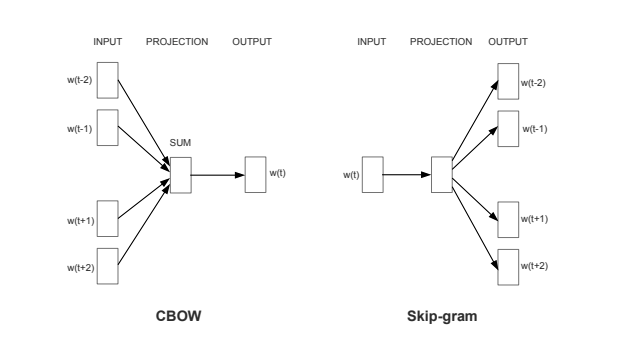

In [1]:
from IPython.display import Image
Image(filename='CBOW-SkipGram.png')

# 🔠 How Word2Vec Works — Step by Step

Let's understand how **Word2Vec** creates word embeddings using a simple sentence.

---

## 🧾 Sample Sentence

"The cat sits on the mat"



Vocabulary:  
`["the", "cat", "sits", "on", "mat"]`  
*(Duplicates like "the" are counted once in the vocabulary.)*

---

## Model Options: CBOW vs Skip-Gram

Word2Vec has two training strategies:

| Model      | Description                                      |
|------------|--------------------------------------------------|
| **CBOW**   | Predicts the target word from its context words  |
| **Skip-Gram** | Predicts the context words from the target word |

We will use **Skip-Gram** in this example.

---

## Step 1: Training Objective (Skip-Gram)

For each word $w_t$, predict words within a window of size $c$ (context).

With window size $c = 2$, the context pairs become:

| Target Word ($w_t$) | Context Words ($w_{t \pm c}$)         |
|----------------------|----------------------------------------|
| "the"               | ["cat", "sits"]                        |
| "cat"               | ["the", "sits", "on"]                  |
| "sits"              | ["the", "cat", "on", "the"]            |
| "on"                | ["cat", "sits", "the", "mat"]          |
| "the"               | ["sits", "on", "mat"]                  |
| "mat"               | ["on", "the"]                          |



---

## Step 2: Convert Words to One-Hot Vectors

Suppose we index our vocabulary as:

| Word   | Index | One-Hot Vector     |
|--------|--------|--------------------|
| "the"  | 0     | $[1, 0, 0, 0, 0]$   |
| "cat"  | 1     | $[0, 1, 0, 0, 0]$   |
| "sits" | 2     | $[0, 0, 1, 0, 0]$   |
| "on"   | 3     | $[0, 0, 0, 1, 0]$   |
| "mat"  | 4     | $[0, 0, 0, 0, 1]$   |

---

## Step 3: Network Architecture

- Input layer: One-hot vector of the target word $w_t$
- Hidden layer: Embedding layer (matrix of size $V \times N$)
- Output layer: Predict probabilities for context words

Let:
- $V$ = vocabulary size (5)
- $N$ = embedding size (e.g., 2)

### Embedding Matrix:
This is a learned weight matrix $W$ of size $V \times N$

$$
W = \begin{bmatrix}
\text{---} & \vec{e}_{\text{the}} & \text{---} \\
\text{---} & \vec{e}_{\text{cat}} & \text{---} \\
\text{---} & \vec{e}_{\text{sits}} & \text{---} \\
\text{---} & \vec{e}_{\text{on}} & \text{---} \\
\text{---} & \vec{e}_{\text{mat}} & \text{---}
\end{bmatrix}
$$

Each row $\vec{e}_w$ is the **embedding vector** of a word.

---

## Step 4: Training Objective

For each $(w_t, w_c)$ pair (target and context word), the model tries to **maximize** the probability:

$$
P(w_c \mid w_t) = \frac{\exp(\vec{v}_{w_c} \cdot \vec{v}_{w_t})}{\sum_{i=1}^{|V|} \exp(\vec{v}_{w_i} \cdot \vec{v}_{w_t})}
$$

This is done using **softmax** over the dot product between the target and context vectors.

To train faster, Word2Vec often uses:
- **Negative Sampling** or
- **Hierarchical Softmax**

---

## Step 5: After Training

After training:
- Each word has a **dense vector representation**.
- Similar words are **closer in vector space**.

---

## Example Output (Hypothetical)

| Word   | Embedding Vector (2D)         |
|--------|-------------------------------|
| "the"  | $[0.1, -0.3]$                 |
| "cat"  | $[0.7, 0.4]$                  |
| "sits" | $[0.6, 0.5]$                  |
| "on"   | $[0.0, 0.2]$                  |
| "mat"  | $[-0.1, 0.3]$                 |

Words like `"cat"` and `"sits"` are close, indicating **semantic similarity**.

---

Use [this concerneing](https://arxiv.org/pdf/1301.3781) article for detailed exploration.

# CBOW vs. Skip-Gram: When to Use Each and Why

**Word2Vec** provides two architectures for learning word embeddings:

| Model       | Predicts             | Given           |
|-------------|----------------------|------------------|
| **CBOW**    | Target word $w_t$    | Surrounding context words $w_{t-c}, ..., w_{t+c}$ |
| **Skip-Gram** | Context words $w_{t-c}, ..., w_{t+c}$ | Target word $w_t$ |

---

## Key Differences

| Aspect               | **CBOW**                                | **Skip-Gram**                            |
|----------------------|------------------------------------------|-------------------------------------------|
| Prediction Task      | Predicts one word from many              | Predicts many words from one              |
| Computational Cost   | Lower (averages context vectors)         | Higher (multiple predictions per word)    |
| Performance on Rare Words | Worse                              | Better (focuses on specific target words) |
| Works well with      | Large datasets and frequent words        | Small datasets and rare words             |
| Training Speed       | Faster                                   | Slower                                    |

---

## When to Use CBOW

- You have a **large and clean corpus**
- You care more about **frequent words** and **faster training**
- You're focused on general-purpose embeddings

> CBOW is efficient and good at capturing the **overall structure** of the language.

---

## When to Use Skip-Gram

- You have a **small corpus**
- You care about **rare words** or nuanced **semantic meaning**
- You want embeddings that **differentiate** between similar words in different contexts

> Skip-Gram tends to perform better for **specialized vocabulary** and **low-resource scenarios**.

---



| Situation                        | Recommended Model |
|----------------------------------|-------------------|
| Large corpus, common vocab       | CBOW              |
| Small corpus, rare/technical vocab | Skip-Gram       |
| Faster training needed           | CBOW              |
| Better accuracy and richer embeddings | Skip-Gram     |

> 💡 In practice, **Skip-Gram** is often preferred for its **semantic richness**, but **CBOW** is faster and easier to train for general use.


In [2]:
# !pip install --force-reinstall gensim tensorflow numba


In [3]:
## References: https://stackoverflow.com/questions/46433778/import-googlenews-vectors-negative300-bin


In [4]:
!pip install gensim
#

See the library in this HuggingFace [model card](https://huggingface.co/fse/word2vec-google-news-300).

In [5]:
import gensim

In [6]:
from gensim.models import Word2Vec, KeyedVectors

In [7]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [8]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [9]:
vec_king.shape

(300,)

In [10]:
wv['cricket']

array([-3.67187500e-01, -1.21582031e-01,  2.85156250e-01,  8.15429688e-02,
        3.19824219e-02, -3.19824219e-02,  1.34765625e-01, -2.73437500e-01,
        9.46044922e-03, -1.07421875e-01,  2.48046875e-01, -6.05468750e-01,
        5.02929688e-02,  2.98828125e-01,  9.57031250e-02,  1.39648438e-01,
       -5.41992188e-02,  2.91015625e-01,  2.85156250e-01,  1.51367188e-01,
       -2.89062500e-01, -3.46679688e-02,  1.81884766e-02, -3.92578125e-01,
        2.46093750e-01,  2.51953125e-01, -9.86328125e-02,  3.22265625e-01,
        4.49218750e-01, -1.36718750e-01, -2.34375000e-01,  4.12597656e-02,
       -2.15820312e-01,  1.69921875e-01,  2.56347656e-02,  1.50146484e-02,
       -3.75976562e-02,  6.95800781e-03,  4.00390625e-01,  2.09960938e-01,
        1.17675781e-01, -4.19921875e-02,  2.34375000e-01,  2.03125000e-01,
       -1.86523438e-01, -2.46093750e-01,  3.12500000e-01, -2.59765625e-01,
       -1.06933594e-01,  1.04003906e-01, -1.79687500e-01,  5.71289062e-02,
       -7.41577148e-03, -

In [11]:
wv.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [12]:
wv.most_similar('happy')

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [13]:
wv.similarity("hockey","sports")

0.53541523

In [14]:
vec = wv['king'] - wv['man']+wv['woman']

In [15]:
vec

array([ 4.29687500e-02, -1.78222656e-01, -1.29089355e-01,  1.15234375e-01,
        2.68554688e-03, -1.02294922e-01,  1.95800781e-01, -1.79504395e-01,
        1.95312500e-02,  4.09919739e-01, -3.68164062e-01, -3.96484375e-01,
       -1.56738281e-01,  1.46484375e-03, -9.30175781e-02, -1.16455078e-01,
       -5.51757812e-02, -1.07574463e-01,  7.91015625e-02,  1.98974609e-01,
        2.38525391e-01,  6.34002686e-02, -2.17285156e-02,  0.00000000e+00,
        4.72412109e-02, -2.17773438e-01, -3.44726562e-01,  6.37207031e-02,
        3.16406250e-01, -1.97631836e-01,  8.59375000e-02, -8.11767578e-02,
       -3.71093750e-02,  3.15551758e-01, -3.41796875e-01, -4.68750000e-02,
        9.76562500e-02,  8.39843750e-02, -9.71679688e-02,  5.17578125e-02,
       -5.00488281e-02, -2.20947266e-01,  2.29492188e-01,  1.26403809e-01,
        2.49023438e-01,  2.09960938e-02, -1.09863281e-01,  5.81054688e-02,
       -3.35693359e-02,  1.29577637e-01,  2.41699219e-02,  3.48129272e-02,
       -2.60009766e-01,  

In [16]:
wv.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [158]:
import pandas as pd
messages=pd.read_csv('sample_data/SMSSpamCollection.txt',
                    sep='\t',names=["label","message"])

In [159]:
messages.shape

(5572, 2)

In [160]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [161]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [202]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review] # This line uses the wordnet resource
    review = ' '.join(review)
    corpus.append(review)

In [203]:
# corpus

In [204]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, messages['message']) if i<1]

[[0, '', '645'], [0, '', ':) '], [0, '', ':-) :-)']]

In [205]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [206]:
# simple_preprocess()

In [236]:
import nltk
nltk.download('punkt_tab')

words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [237]:
# words

In [238]:
## Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words)

In [239]:
Word2Vec()

In [240]:
## To Get All the Vocabulary
# model.wv.index_to_key

In [241]:
model.corpus_count

5569

In [242]:
model.epochs

5

In [243]:
model.wv.similar_by_word('good')


[('wa', 0.9986706376075745),
 ('all', 0.9985573291778564),
 ('not', 0.9985485672950745),
 ('morning', 0.9985277056694031),
 ('is', 0.9983046650886536),
 ('night', 0.998296856880188),
 ('got', 0.998219907283783),
 ('very', 0.9981677532196045),
 ('and', 0.9981538653373718),
 ('about', 0.9981374144554138)]

In [244]:
model.wv['good'].shape

(100,)

In [245]:
words[0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [247]:
!pip install tqdm

In [248]:
from tqdm import tqdm

In [246]:
# def avg_word2vec(doc):
#     # remove out-of-vocabulary words
#     #sent = [word for word in doc if word in model.wv.index_to_key]
#     #print(sent)

#     return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
#                 #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [249]:
# #apply for the entire sentences
# import numpy as np
# X=[]
# for i in tqdm(range(len(words))):
#     X.append(avg_word2vec(words[i]))

In [250]:


def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)

    vectors = [model.wv[word] for word in doc if word in model.wv.index_to_key]

    if vectors:  # Check if the list is not empty
        return np.mean(vectors, axis=0)
    else:
        # If no valid word vectors, consider returning zeros or handling differently
        return np.zeros(model.vector_size)  # Assumes model has a vector_size attribute
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [222]:

# Initialize X as an empty list
X = []

# Iterate through words to calculate average word vectors
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))



100%|██████████| 5569/5569 [00:00<00:00, 6228.44it/s]


In [223]:
# X

In [224]:
len(X)

5569

In [225]:
messages.shape


(5572, 2)

In [226]:
X[1]

array([-1.60490319e-01,  2.12519348e-01,  1.06277905e-01,  7.47921392e-02,
        8.67878795e-02, -4.44298238e-01,  1.51355103e-01,  4.16478097e-01,
       -2.59536505e-01, -1.01106219e-01, -1.46349028e-01, -3.20931047e-01,
       -4.28096876e-02,  9.27886143e-02,  1.89364091e-01, -1.46519363e-01,
        1.09816112e-01, -2.62123883e-01, -7.92327225e-02, -4.61029470e-01,
        1.80974543e-01,  8.78560245e-02,  6.14411980e-02, -2.04132915e-01,
       -3.35893556e-02, -1.08291171e-02, -1.97092593e-01, -1.89076915e-01,
       -2.30035603e-01,  1.60971098e-02,  2.63201654e-01,  1.62090603e-02,
        9.93053466e-02, -1.58715248e-01, -1.12777695e-01,  3.51561069e-01,
        5.70144206e-02, -1.02072790e-01, -9.67702344e-02, -4.21561480e-01,
        9.30551067e-02, -1.97386593e-01, -1.37758881e-01, -1.22682774e-04,
        1.26634434e-01,  1.35002444e-02, -1.03702396e-01, -1.54016400e-02,
        1.91765696e-01,  1.32833406e-01,  1.43629268e-01, -1.58858523e-01,
       -4.63253856e-02,  

In [227]:
##independent Features
# Convert X to a NumPy array
X_new = np.array(X)

In [228]:
X_new.shape

(5569, 100)

In [229]:
X_new[0].shape

(100,)

In [233]:
## Dependent Features
## Output Features
y = messages[list(map(lambda x: len(x)>0 ,corpus))]
y=pd.get_dummies(y['label'])
y=y.iloc[:,0].values
y = [int(x) for x in y]

In [235]:
# y

In [80]:
y.shape

(5569,)

In [256]:
X[0].reshape(1,-1).shape

(1, 100)

In [254]:
## this is the final independent features
df = pd.DataFrame()
for i in range(0,len(X)):
    # Use pd.concat instead of append
    df = pd.concat([df, pd.DataFrame(X[i].reshape(1,-1))], ignore_index=True)



In [253]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.168950,0.237378,0.122482,0.085421,0.091213,-0.501899,0.183781,0.463209,-0.291909,-0.121244,...,0.354752,0.158085,0.013544,0.049877,0.433643,0.181576,0.139934,-0.205713,0.154131,-0.009024
1,-0.160490,0.212519,0.106278,0.074792,0.086788,-0.444298,0.151355,0.416478,-0.259537,-0.101106,...,0.321266,0.133941,0.006523,0.039150,0.375584,0.156179,0.124199,-0.191267,0.144357,-0.015383
2,-0.175173,0.249173,0.139926,0.092454,0.072960,-0.545303,0.188575,0.451982,-0.307102,-0.152494,...,0.343238,0.160844,0.003505,0.026769,0.443698,0.168975,0.094374,-0.237084,0.174231,0.013479
3,-0.234098,0.318077,0.155811,0.118802,0.123617,-0.669234,0.236949,0.627362,-0.396040,-0.152721,...,0.480682,0.206588,0.014109,0.073927,0.569835,0.248591,0.201802,-0.280418,0.208607,-0.022426
4,-0.200898,0.265054,0.139445,0.098102,0.113252,-0.565153,0.200889,0.535328,-0.336120,-0.135277,...,0.411819,0.172262,0.017156,0.066758,0.483602,0.210081,0.164961,-0.246728,0.169200,-0.021576


In [257]:
X[0].reshape(1,-1).shape

(1, 100)

In [258]:
df.shape

(5569, 100)

In [259]:
## Independent Feature
X=df

In [260]:
# Dependent Feature
df['Output']=y

In [261]:
y=df['Output']

In [264]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [265]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
897,-0.226221,0.300656,0.151531,0.097334,0.118307,-0.621206,0.225027,0.585775,-0.372130,-0.151318,...,0.188220,0.018689,0.074781,0.531101,0.244471,0.178820,-0.260979,0.171670,-0.023936,1
1282,-0.225667,0.307717,0.160346,0.111449,0.117641,-0.652474,0.236924,0.610084,-0.384718,-0.160403,...,0.215434,0.030963,0.070374,0.578813,0.240360,0.191240,-0.264379,0.197500,-0.011214,1
5385,-0.220317,0.304285,0.149016,0.107433,0.116952,-0.615409,0.226231,0.592997,-0.363050,-0.143500,...,0.194478,0.027675,0.079918,0.548795,0.247055,0.205547,-0.244744,0.180433,-0.024553,1
980,-0.185358,0.241166,0.114416,0.083048,0.094401,-0.507586,0.175669,0.475142,-0.298296,-0.126096,...,0.154489,0.022213,0.058031,0.427935,0.188246,0.143014,-0.209359,0.152542,-0.012068,1
3341,-0.226738,0.306637,0.153325,0.106939,0.127949,-0.621770,0.226100,0.595710,-0.365084,-0.145803,...,0.192965,0.023115,0.073503,0.541279,0.238026,0.188046,-0.257361,0.178724,-0.015479,1


In [266]:
y_train

,Output
897,1
1282,1
5385,1
980,1
3341,1
...,...
538,1
4225,1
3571,1
3657,1


In [269]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [274]:
# Convert all column names to strings in X before splitting
X.columns = X.columns.astype(str)

# Now perform the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Proceed with fitting the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [275]:
y_pred=classifier.predict(X_test)

In [276]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.9991023339317774


In [277]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       1.00      1.00      1.00       963

    accuracy                           1.00      1114
   macro avg       1.00      1.00      1.00      1114
weighted avg       1.00      1.00      1.00      1114

